In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
labels_all = pd.read_csv(r"C:\Users\afrah\Downloads\dog breed\labels.csv")
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
breeds_all = labels_all["breed"]
breed_counts = breeds_all.value_counts()
breed_counts.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [4]:
CLASS_NAMES = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed'].isin(CLASS_NAMES))]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [5]:

X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32')
Y_data = label_binarize(labels['breed'], classes = CLASS_NAMES)

for i in tqdm(range(len(labels))):
    img = image.load_img(r"C:\Users\afrah\Downloads\dog breed\train\728b6f85d37f74e5f5c4a477103da84f.jpg", target_size=(224, 224))
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|███████████████████████████████████████████████████████████████████████████████| 357/357 [00:02<00:00, 155.53it/s]


Train Images shape:  (357, 224, 224, 3)  size: 53,738,496
One-hot encoded output shape:  (357, 3)  size: 1,071


In [6]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5), activation ='relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16, kernel_size = (7,7), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8, kernel_size = (5,5), activation ='relu', kernel_regularizer = 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(64, activation = "relu", kernel_regularizer = 'l2'))
model.add(Dense(len(CLASS_NAMES), activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 108, 108, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 16)        25104     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 16)       0

In [7]:
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size = 0.2)

In [8]:
epochs = 50
batch_size = 128

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (X_val, Y_val))


Epoch 1/50
2/2 [==============================] - 61s 30s/step - loss: 4.9009 - accuracy: 0.3086 - val_loss: 4.8827 - val_accuracy: 0.2923
Epoch 2/50
2/2 [==============================] - 53s 30s/step - loss: 4.8756 - accuracy: 0.3555 - val_loss: 4.8592 - val_accuracy: 0.2923
Epoch 3/50
2/2 [==============================] - 50s 26s/step - loss: 4.8501 - accuracy: 0.3555 - val_loss: 4.8350 - val_accuracy: 0.2923
Epoch 4/50
2/2 [==============================] - 57s 33s/step - loss: 4.8255 - accuracy: 0.3555 - val_loss: 4.8108 - val_accuracy: 0.2923
Epoch 5/50
2/2 [==============================] - 53s 27s/step - loss: 4.8009 - accuracy: 0.3555 - val_loss: 4.7863 - val_accuracy: 0.2923
Epoch 6/50
2/2 [==============================] - 50s 26s/step - loss: 4.7766 - accuracy: 0.3555 - val_loss: 4.7623 - val_accuracy: 0.2923
Epoch 7/50
2/2 [==============================] - 54s 29s/step - loss: 4.7521 - accuracy: 0.3555 - val_loss: 4.7382 - val_accuracy: 0.2923
Epoch 8/50
2/2 [===========

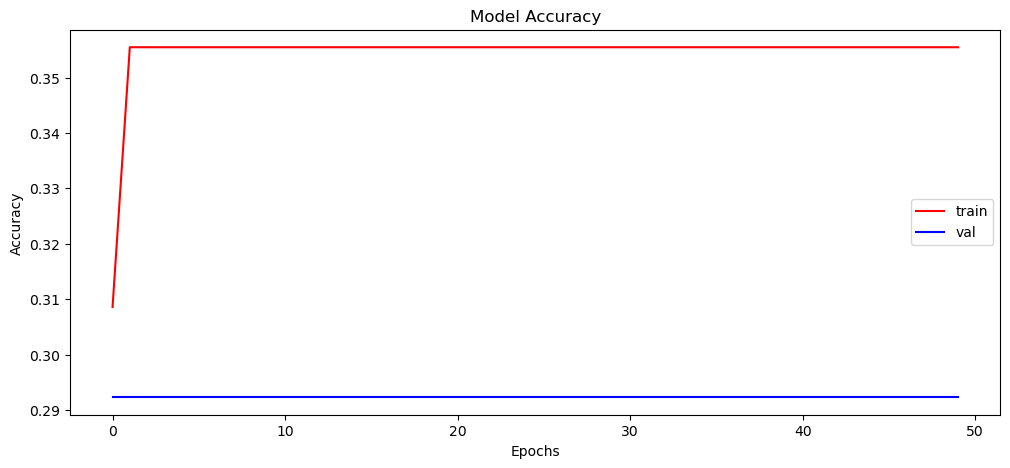

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [10]:
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

2/2 [==============================] - 0s 64ms/step - loss: 3.8403 - accuracy: 0.1944
Accuracy over the test set: 
  19.44 %


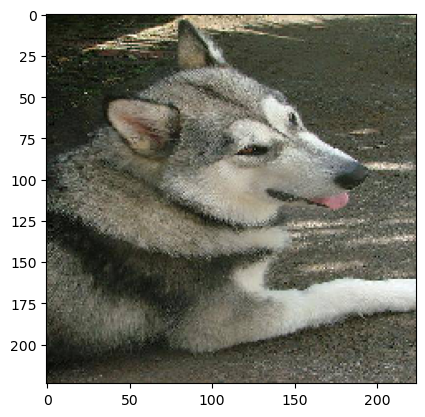

Originally :  scottish_deerhound
Predicted :  maltese_dog


In [11]:

plt.imshow(X_test[2,:,:,:])
plt.show()
print("Originally : ",labels['breed'][np.argmax(Y_test[2])])
print("Predicted : ",labels['breed'][np.argmax(Y_pred[2])])

